In [ ]:
%env HF_HOME=/rcfs/projects/steel_thread/hora620/hf
%env TORCH_EXTENSIONS_DIR=/rcfs/projects/steel_thread/hora620/pytorch

In [1]:
from PIL import Image
import json
import os
import random
import pandas as pd
import re

## HF Datasets

In [ ]:
from datasets import load_dataset

dataset = load_dataset("AI4Math/MathVista")

In [ ]:
# print the first example on the testmini set
print(dataset["testmini"][0])
print(dataset["testmini"][0]['pid']) # print the problem id 
print(dataset["testmini"][0]['question']) # print the question text 
print(dataset["testmini"][0]['query']) # print the query text
print(dataset["testmini"][0]['image']) # print the image path
print(dataset["testmini"][0]['answer']) # print the answer
dataset["testmini"][0]['decoded_image'] # display the image


In [ ]:

# print the first example on the test set
print(dataset["test"][0])

## Local

In [2]:
data_base_dir='/qfs/projects/steel_thread/hora620/DevHub/scientific-instruction-tuning/MathVista/data'
data_path='/qfs/projects/steel_thread/hora620/DevHub/scientific-instruction-tuning/MathVista/data/testmini.json'
list_data_dict = json.load(open(data_path, "r"))

In [4]:
list_data_dict_df=pd.DataFrame([[i,m['question'],m['metadata']['source']] for i,m in list_data_dict.items()])
list_data_dict_df.columns=['index','question','metadata_source']

In [5]:
list_data_dict_df

,index,question,metadata_source
0,1,"When a spring does work on an object, we canno...",SciBench
1,2,what is the total volume of the measuring cup?,TextVQA
2,3,△ABC的两内角平分线OB、OC相交于点O，若∠A＝110°，则∠BOC＝（）,GeoQA+
3,4,Subtract all large rubber spheres. Subtract al...,CLEVR-Math
4,5,Find $m\angle H$,Geometry3K
...,...,...,...
995,996,Subtract all big shiny balls. Subtract all blu...,CLEVR-Math
996,997,Is kx^2/2 larger than E at x=0?,FunctionQA
997,998,如图：∠AOB：∠BOC：∠COD＝2：3：4，射线OM、ON，分别平分∠AOB与∠COD，...,GeoQA+
998,999,The magnitude of the acceleration vector a is ...,SciBench


In [6]:
list_data_dict_df.groupby('metadata_source').size().sort_values(ascending=False)

metadata_source
IconQA          62
FunctionQA      62
TabMWP          62
Super-CLEVR     62
Geometry3K      62
GeoQA+          62
UniGeo          62
FigureQA        62
CLEVR-Math      62
DVQA            62
KVQA            60
ChartQA         50
AI2D            43
IQTest          37
VQA2.0          32
GEOS            22
PlotQA          19
PaperQA         19
SciBench        17
TQA             16
DocVQA          12
TheoremQA       11
ScienceQA        9
MapQA            8
VQA-AS           7
A-OKVQA          6
TextVQA          6
ParsVQA-Caps     2
VQA-RAD          2
PMC-VQA          1
VizWiz           1
dtype: int64

In [10]:
# sample_question="What is the size of the shaded area under the curve?"
# sample_index=list_data_dict_df[list_data_dict_df['question'].str.match(sample_question)].iloc[0]['index']

sample_index=list_data_dict_df.query('metadata_source=="ScienceQA"').iloc[1]['index']
print(sample_index)

43


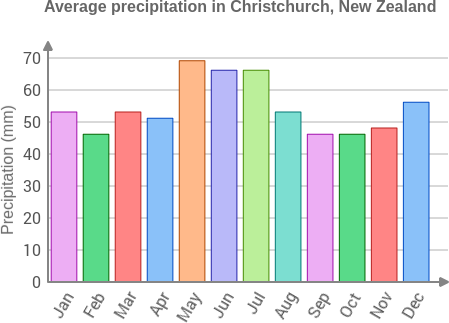

Use the graph to answer the question below. Which month is the wettest on average in Christchurch?
images/43.jpg
May


{'split': 'testmini',
 'language': 'english',
 'img_width': 449,
 'img_height': 323,
 'source': 'ScienceQA',
 'category': 'general-vqa',
 'task': 'textbook question answering',
 'context': 'line plot',
 'grade': 'elementary school',
 'skills': ['scientific reasoning', 'statistical reasoning']}

In [11]:
## searching for qualitative examples
from IPython.display import Image, display
sample_index='43'

record=list_data_dict[sample_index]


image_file=record['image']
display(Image(filename=os.path.join(data_base_dir, image_file)))
# image = Image.open(os.path.join(image_folder, image_file)).convert('RGB')
print(record['question'])
print(record['image']) # print the image path
print(record['answer']) # print the answer
display(record['metadata']) # print the answer
        

## Generated Responses

In [13]:
results_file="/rcfs/projects/steel_thread/models/LLAVA-7b-pretrain-scitune-333472-v2-13B/mathvista/llava_val_mathvista_prediction_1000_v2.jsonl"

In [14]:
results=dict()
for line in open(results_file):
    line_json=json.loads(line)
    results.setdefault(line_json["question_id"],line_json)

In [15]:
results[sample_index]

{'question_id': '43',
 'prompt': 'Question: Use the graph to answer the question below. Which month is the wettest on average in Christchurch?\nChoices:\n(A) August\n(B) April\n(C) May\nImage detected text: []\nHint: Please answer the question and provide the correct option letter, e.g., A, B, C, D, at the end.\nSolution:\n<image>',
 'text': 'Assistant: Bar Chart Average monthly rainfall in Christchurch, New Zealand.\nWuu\tW\tA\tB\tC\tD\nAverage monthly rainfall in Christchurch, New Zealand. Bar Chart. 5 shows the average monthly precipitation in Christchurch, New Zealand. This time, the average monthly precipitation is 61 mm. For this example, the average monthly rainfall is taken from the observed precipitation. We can see that the months with highest precipitation are May, June, October, November and December. The wettest month on average is May with 62 mm of precipitation.\nAverage monthly precipitation in Christchurch, New Zealand. Bar Chart. 5 shows the average monthly precipitat